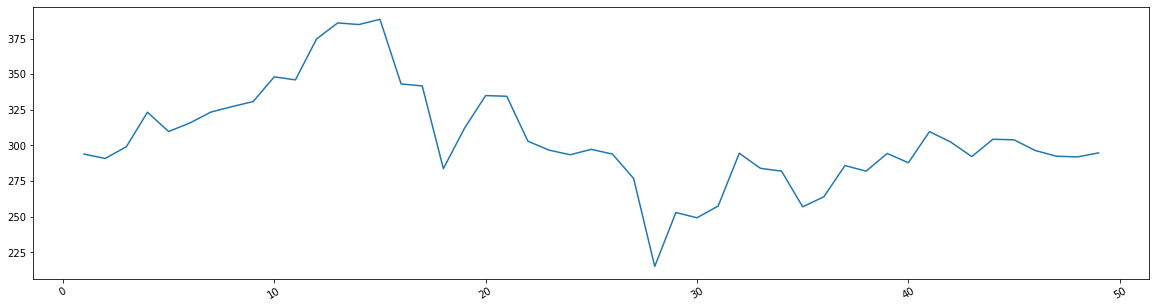

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams["figure.figsize"] = 20,5
df = pd.read_csv("features_rolled.csv", header=0, index_col=0)
plt.plot(df[1:50]["close_x"])
plt.xticks(rotation=30)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns
from sklearn import preprocessing
from sklearn import cross_decomposition
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set()

# Make charts a bit bolder
#sns.set_context("talk")

%matplotlib inline

# Default figure size
sns.set(rc={"figure.figsize": (12, 6)})

# This actually makes autocomplete WAY faster ...
%config Completer.use_jedi = False

# Show only 2 decimals for floating point numbers
pd.options.display.float_format = "{:.2f}".format

sns.set_style('whitegrid')


,Unnamed: 0,unix,date,open_x,high_x,low_x,close_x,log_return_x,Volume ETH,Volume USDT_x,open_y,high_y,low_y,close_y,Volume BTC,Volume USDT_y,log_return_y
0,1576,1502928000.00,2017-08-17,303.61,312.18,298.21,302.00,0.00,6155.32,1890017.53,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,0.00
1,1575,1503014400.00,2017-08-18,302.00,311.79,283.94,293.96,-0.03,9392.79,2815460.24,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,-0.04
2,1574,1503100800.00,2017-08-19,293.96,299.90,278.00,290.91,-0.01,2140.08,618248.58,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,0.01
3,1573,1503187200.00,2017-08-20,290.91,300.53,282.85,299.10,0.03,2469.49,730800.66,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,-0.01
4,1572,1503273600.00,2017-08-21,299.10,346.52,294.60,323.29,0.08,5134.54,1661944.36,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,-0.02


In [34]:
features = pd.read_csv('features.csv', parse_dates = ['date'])

features.head()
eth = features[['date','close_x']]
eth.reset_index()
eth = eth.set_index('date')
eth.head()

,close_x
date,
2017-08-17,302.00
2017-08-18,293.96
2017-08-19,290.91
2017-08-20,299.10
2017-08-21,323.29


In [35]:

REth= eth.resample(rule='W').last()
returns = REth.pct_change()

autocorrelation = returns['close_x'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

#Momentum!

The autocorrelation of weekly returns is 0.07


In [36]:
REth.head()

,close_x
date,
2017-08-20,299.10
2017-08-27,348.13
2017-09-03,341.77
2017-09-10,293.50
2017-09-17,257.55


C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[1.         0.9942604  0.98911578 0.98400942 0.97892172 0.97384516
 0.96925553 0.96388209 0.95815381 0.95238538 0.94668997 0.94108194
 0.9358823  0.931401   0.92675238 0.92134402 0.91652968 0.91191696
 0.90738263 0.90283016 0.89796416 0.89333903 0.88924008 0.88465611
 0.88000697 0.87487991 0.86972866 0.86449912 0.85896706 0.85305435
 0.84754308 0.84152872 0.83515177 0.8294611  0.82355346 0.81769016
 0.81165928 0.80552006 0.7993673  0.79397796 0.78879646]


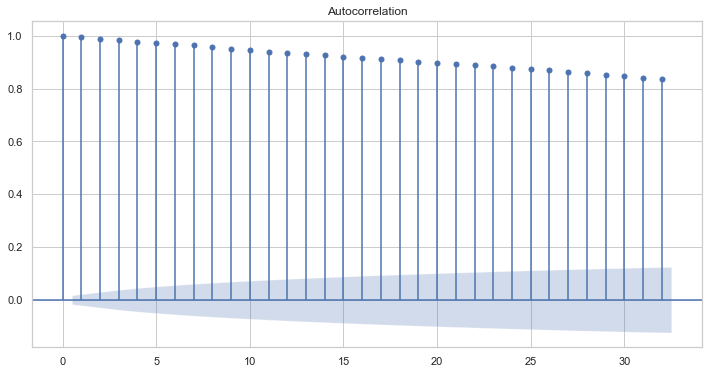

In [40]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_array = acf(eth)
print(acf_array)

plot_acf(eth, alpha = .5)
plt.show()

The approximate confidence interval is +/- 0.13


C:\Users\wfara\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


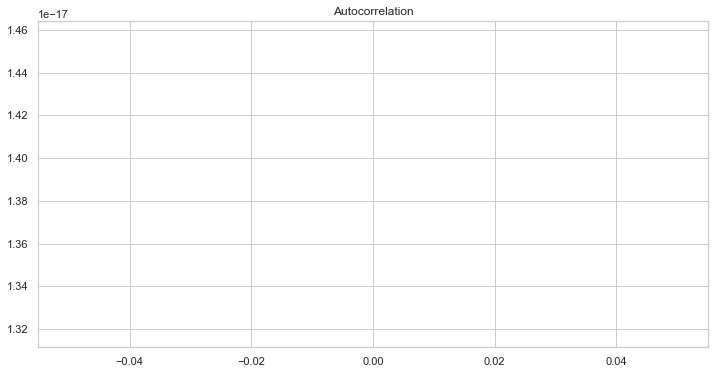

In [41]:
from math import sqrt
nobs = len(returns)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

plot_acf(returns, alpha=0.05, lags = 20)
plt.show()

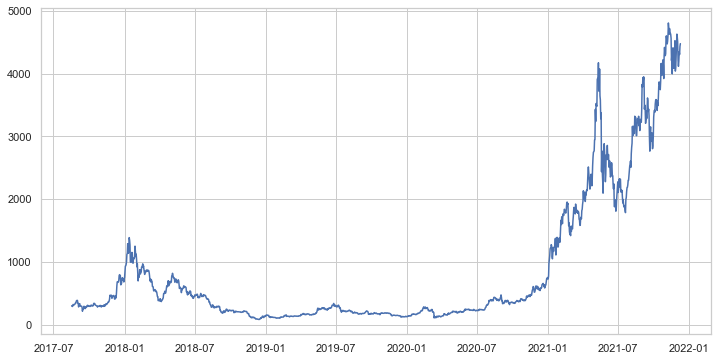

In [43]:
plt.plot(eth)


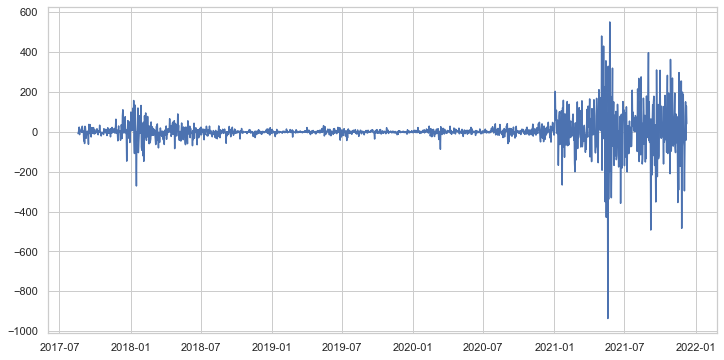

In [44]:
#now stationary
plt.plot(eth.diff())

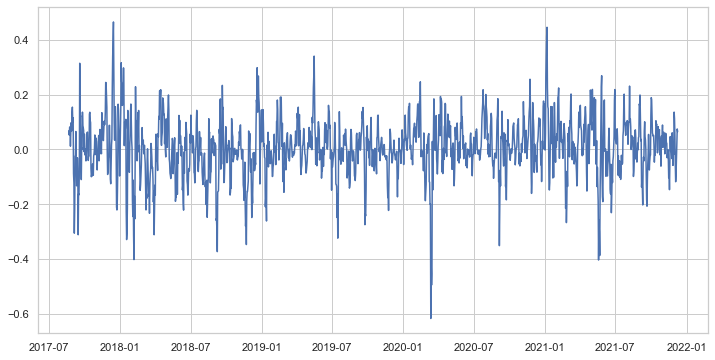

In [48]:
plt.plot(np.log(eth).diff(4))

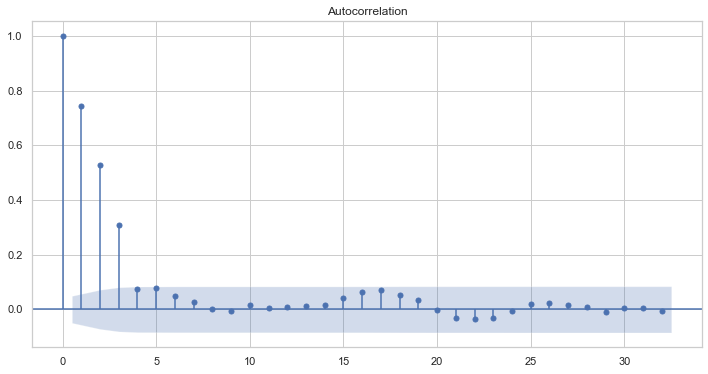

In [52]:
stEth = np.log(eth).diff(4)
stEth.head()
stEth = stEth.dropna()
plot_acf(stEth)
plt.show()

In [56]:
stEth.index = pd.DatetimeIndex(stEth.index).to_period('D')

stEth.head()

,close_x
date,
2017-08-21,0.07
2017-08-22,0.05
2017-08-23,0.08
2017-08-24,0.08
2017-08-25,0.01


In [70]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(stEth, order=[4,0])
res = mod.fit()

C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [71]:
print(res.summary())

# Print out the estimate for the constant and for phi

print(res.params)

                              ARMA Model Results                              
Dep. Variable:                close_x   No. Observations:                 1573
Model:                     ARMA(4, 0)   Log Likelihood                1985.918
Method:                       css-mle   S.D. of innovations              0.068
Date:                Tue, 14 Dec 2021   AIC                          -3959.836
Time:                        03:40:37   BIC                          -3927.672
Sample:                    08-21-2017   HQIC                         -3947.882
                         - 12-09-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0069      0.005      1.498      0.134      -0.002       0.016
ar.L1.close_x     0.7473      0.025     30.316      0.000       0.699       0.796
ar.L2.close_x     0.0710      0.031     

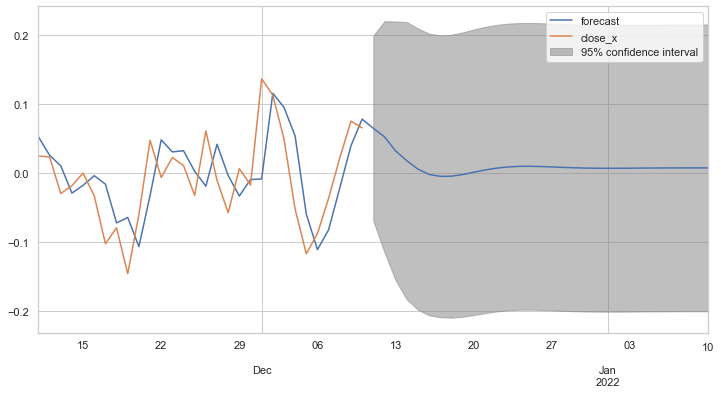

In [72]:
res.plot_predict(start=1543, end=1603)
plt.show()

C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='date'>

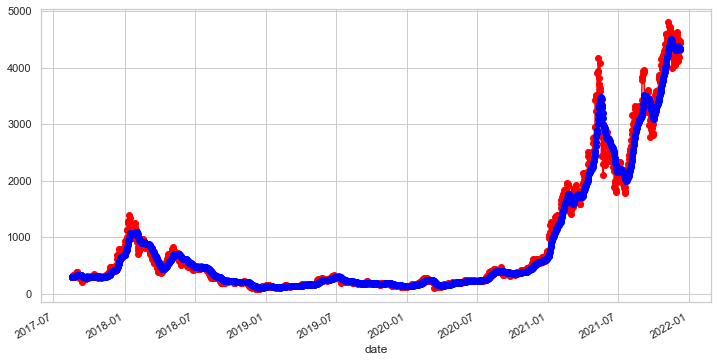

In [63]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(eth['close_x']).fit(smoothing_level = 0.1, optimized = False)

eth['close_x'].plot(marker = 'o', color = 'red')
model.fittedvalues.plot(marker = 'o', color ='blue')

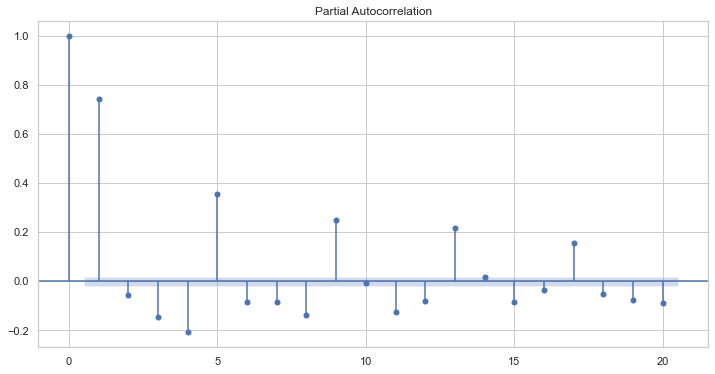

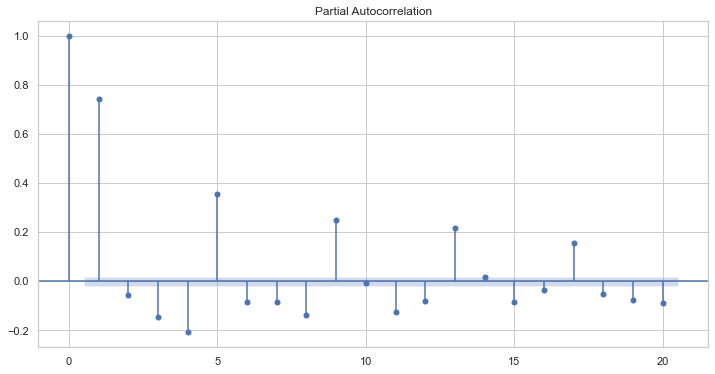

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stEth,lags = 20, alpha =.5)

In [93]:
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(stEth, order = (0,4))
result = mod.fit()

C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [94]:
print(result.summary())

print('params are : ')
print(result.params)


                              ARMA Model Results                              
Dep. Variable:                close_x   No. Observations:                 1573
Model:                     ARMA(0, 4)   Log Likelihood                2338.435
Method:                       css-mle   S.D. of innovations              0.054
Date:                Tue, 14 Dec 2021   AIC                          -4664.871
Time:                        04:07:39   BIC                          -4632.706
Sample:                    08-21-2017   HQIC                         -4652.917
                         - 12-09-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0068      0.005      1.344      0.179      -0.003       0.017
ma.L1.close_x     0.9301      0.024     38.993      0.000       0.883       0.977
ma.L2.close_x     0.9276      0.024     

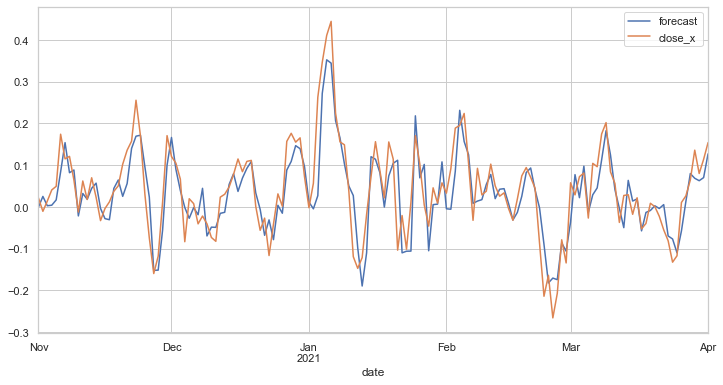

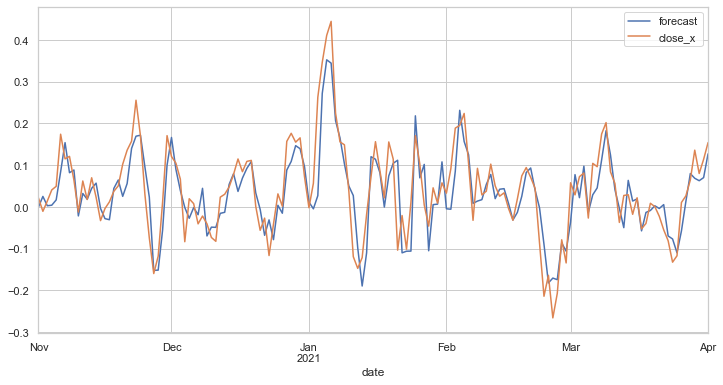

In [98]:
result.plot_predict(start = '2020-11-01', end = '2021-04-01')

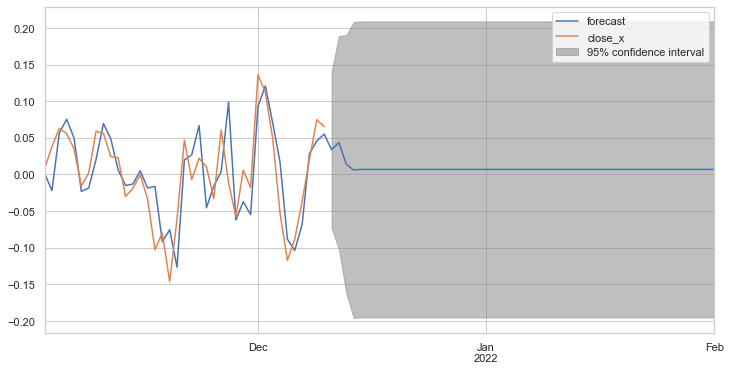

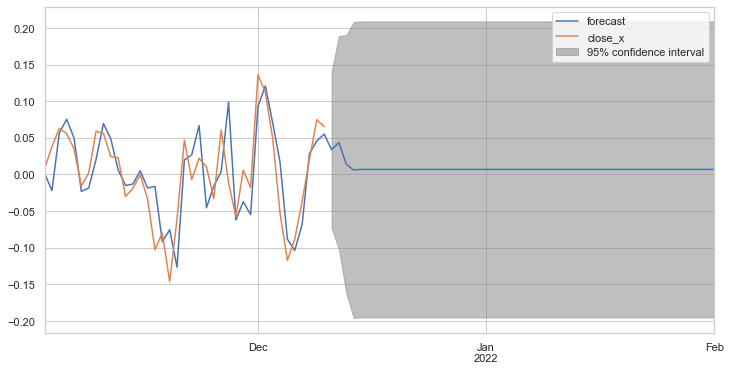

In [101]:
result.plot_predict(start = '2021-11-01', end = '2022-02-01')

In [103]:
btc = features[['date', 'close_y']]
btc = btc.set_index('date')



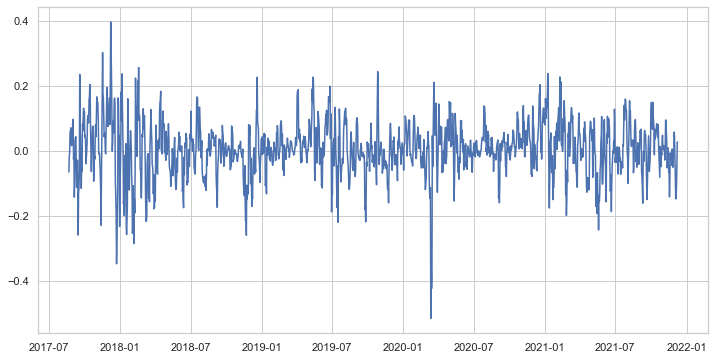

In [115]:
SBTC = np.log(btc).diff(4)
plt.plot(SBTC)

SBTC = SBTC.dropna()

In [116]:
nEth = np.log(eth).diff(4)
nEth = nEth.dropna()

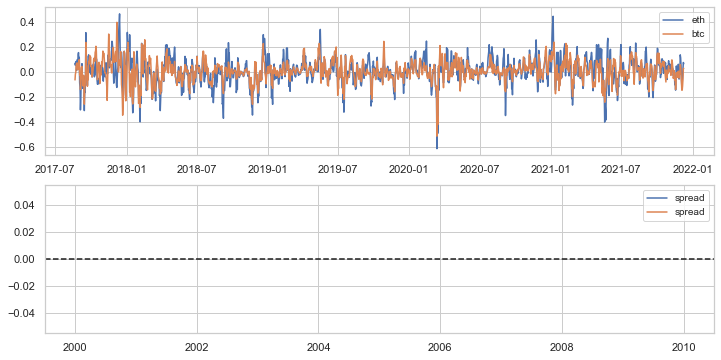

In [118]:
#check for cointigration, or rather coin-tergration ha  ha   ha   ha 
plt.subplot(2,1,1)
plt.plot(nEth, label = 'eth')
plt.plot(SBTC, label ='btc')
plt.legend(loc='best', fontsize='small')
plt.legend(loc='best', fontsize='small')

plt.subplot(2,1,2)
plt.plot(nEth-SBTC, label = 'spread')

plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [122]:
#dickyfueller check
from statsmodels.tsa.stattools import adfuller

result_ETH = adfuller(nEth['close_x'])
print("The p-value for the ADF test on ETH is ", result_ETH[1])
result_BTC = adfuller(SBTC['close_y'])
print("The p-value for the ADF test on BTC is ", result_BTC[1])

# Compute the ADF of the spread
result_spread = adfuller(nEth['close_x'] - SBTC['close_y'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on ETH is  6.7079733496973025e-09
The p-value for the ADF test on BTC is  2.429118739105901e-09
The p-value for the ADF test on the spread is  8.180808297906897e-08


In [124]:
#We can reject null hypothesis that the spread is a random walk, lower p value indicates cointegration

import statsmodels.api as sm

# Regress BTC on ETH
ETH = sm.add_constant(eth)
result = sm.OLS(btc,ETH).fit()

b = result.params[1]
adf_stats = adfuller(btc['close_y'] - b*ETH['close_x'])
print("The p-value for the ADF test is ", adf_stats[1])
#below also suggests cointegration

The p-value for the ADF test is  0.14722711460465115


In [131]:
mod = ARMA(stEth, order = (1,3))
result = mod.fit()
print(result.summary())

print('params are : ')
print(result.params)


C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                close_x   No. Observations:                 1573
Model:                     ARMA(1, 3)   Log Likelihood                2339.031
Method:                       css-mle   S.D. of innovations              0.054
Date:                Tue, 14 Dec 2021   AIC                          -4666.061
Time:                        05:05:42   BIC                          -4633.897
Sample:                    08-21-2017   HQIC                         -4654.107
                         - 12-09-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0068      0.005      1.348      0.178      -0.003       0.017
ar.L1.close_x    -0.0800      0.025     -3.172      0.002      -0.129      -0.031
ma.L1.close_x     1.0007      0.004    2

C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wfara\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


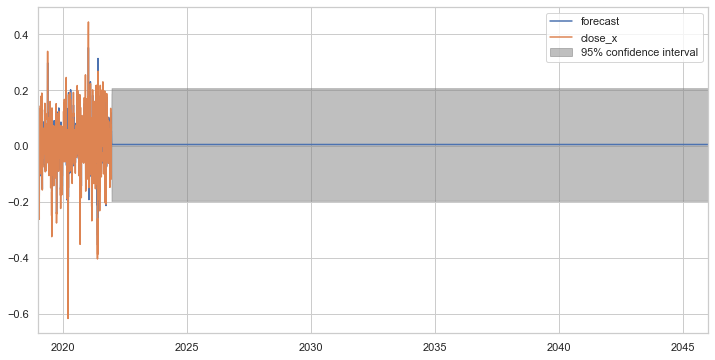

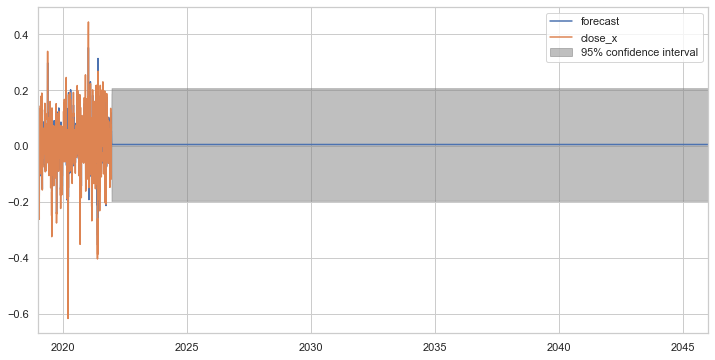

In [132]:
result.plot_predict(start = '2019-01-01', end = '2046-01-01')

In [203]:
stEth['forecast'] = model.predict(start =0, end = 1630)

In [204]:
stEth.head()

,close_x,forecast
date,,
2017-08-21,0.07,0.00
2017-08-22,0.05,0.07
2017-08-23,0.08,0.05
2017-08-24,0.08,0.08
2017-08-25,0.01,0.09


In [206]:
y_pred = stEth.forecast
y_truth = stEth.close_x
rmse = np.sqrt(((y_pred - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 0.09


In [139]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(stEth.close_x, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [140]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters      aic
8     (2, 2) -4103.96
3     (1, 0) -3652.54
1     (0, 1) -3652.43
2     (0, 2) -3651.10
6     (2, 0) -3650.55


In [141]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                close_x   No. Observations:                 1573
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2056.979
Date:                Tue, 14 Dec 2021   AIC                          -4103.958
Time:                        05:24:55   BIC                          -4077.158
Sample:                    08-21-2017   HQIC                         -4093.998
                         - 12-09-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0558      0.017     -3.195      0.001      -0.090      -0.022
ar.L2         -0.4835      0.015    -31.833      0.000      -0.513      -0.454
ma.L1          0.0009      0.002      0.357      0.7

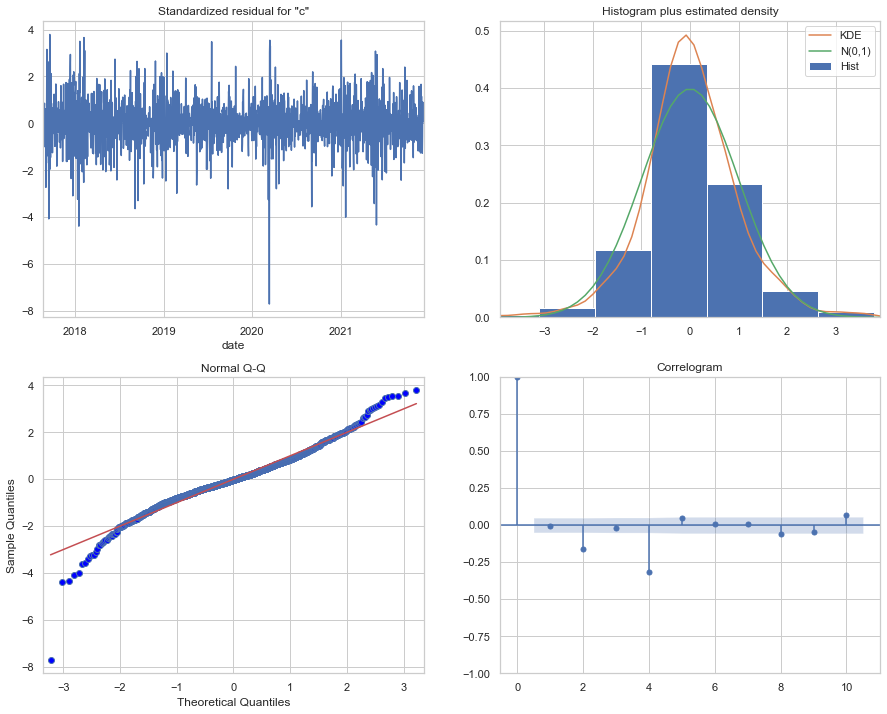

In [142]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [196]:
from scipy.special import boxcox, inv_boxcox
eth_pred_c = stEth[['close_x']]
date_list = [datetime(2018,6,30), datetime(2018,5,30), datetime(2018,3,31), datetime(2018,4,30)]
future = pd.DataFrame(index=date_list, columns= stEth.columns)
eth_pred = pd.concat([eth_pred_c, future])
eth_pred['forecast'] = inv_boxcox(best_model.predict(start=datetime(2018,1,1),end=datetime(2046,1,1)),0)

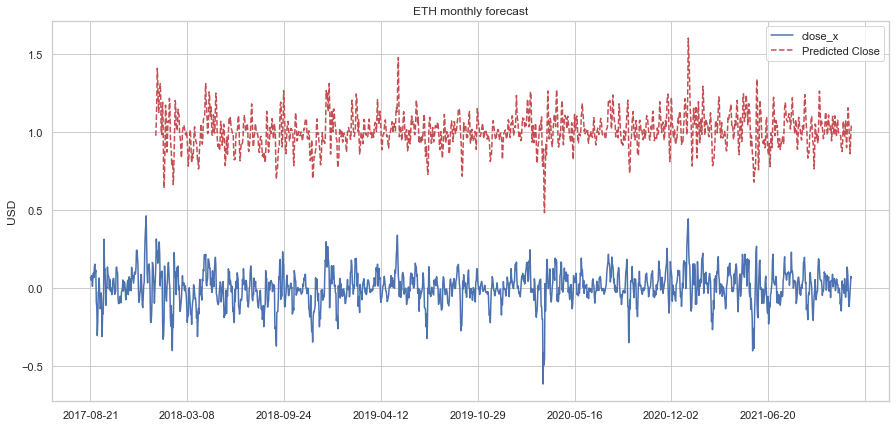

In [197]:
plt.figure(figsize=(15,7))
eth_pred.close_x.plot()
eth_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('ETH monthly forecast')
plt.ylabel('USD')
plt.show()